Digipex AI Internship Task 2:Telecom Customer Churn Prediction.
 # 🎯 Project Goal: Telecom Customer Churn Prediction


# 💡Objective

In this project, we are building a machine learning model that can predict if a telecom customer will leave the company or not.

This kind of task is very useful in real life. Telecom companies want to know early which customers might stop using their services, so they can take action and try to keep them.

---

## ❓ Problem Statement

I am  helping the customer experience team of a telecom company.  
They have noticed that more and more customers are leaving their service, and they want to fix this problem.

My job is to:

- ✔ Predict which customers are likely to leave (churn)  
- ✔ Explain which things (features) are causing customers to leave  
- ✔ Give helpful suggestions to the business team so they can keep their customers


## 📂 Dataset Information

I am using a free dataset from Kaggle:  
**[Telco Customer Churn Dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)**

It has details about *7,043 customers*, including:

- 👥 Personal info: gender, senior citizen or not, has dependents  
- 📝 Account info: how long they stayed (tenure), how they pay, contract type  
- 📡 Services used: phone, internet, streaming, etc.  
- 🎯 Target column: Churn — whether the customer left or not






In [ ]:
#step 1
import pandas as pd
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


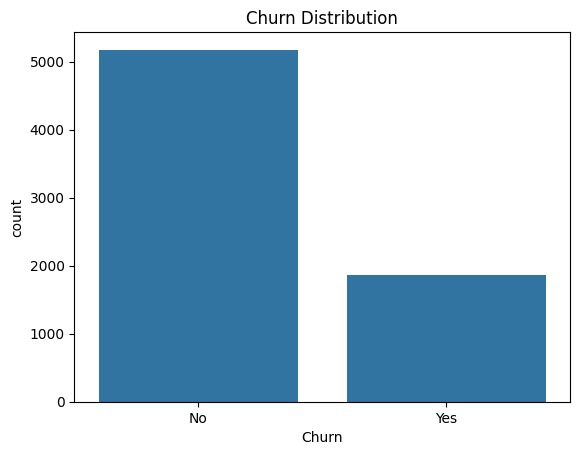

In [ ]:

#🧹 Step 2: Exploratory Data Analysis (EDA)
# 🔍 EDA 1: Churn Distribution
# We want to check how many customers have churned and how many have stayed.
# This helps us understand if the data is balanced or imbalanced.
# If it's imbalanced, we will need to handle that during model training.

import seaborn as sns
import matplotlib.pyplot as plt
#Churn Distribution

sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()





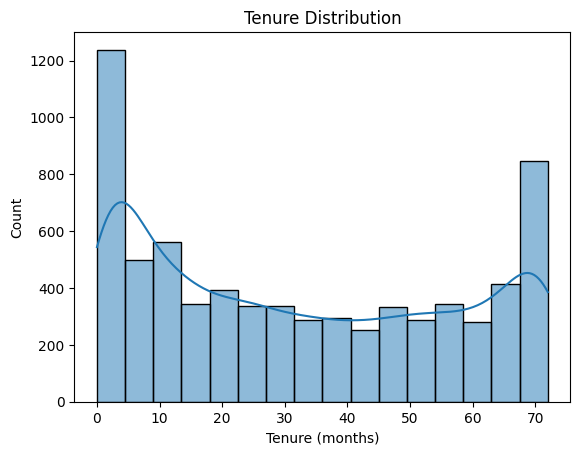

In [ ]:
#Tenure Distribution
# 🔍 EDA 2: Tenure Distribution

# This graph shows for how many months customers have stayed with the company.
# It helps us understand how many customers are new and how many are old.
# If most customers who leave (churn) are new (short tenure),
# then the company should try to support and retain new users better.
# Example: Give welcome offers or better service to new customers.

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['tenure'], kde=True)
plt.title("Tenure Distribution")
plt.xlabel("Tenure (months)")
plt.show()


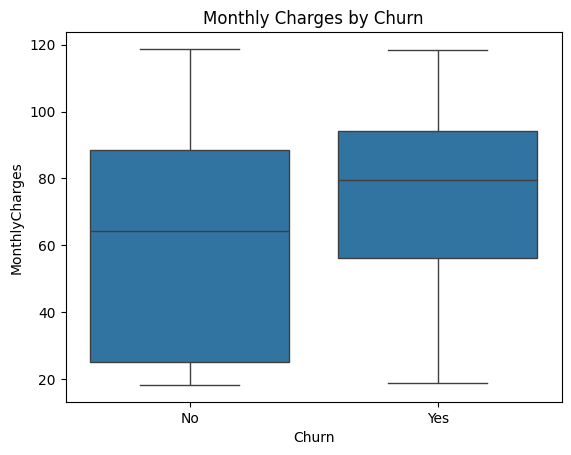

In [ ]:
# 🔍 EDA 3: Monthly Charges by Churn
# This graph shows how much money customers pay per month
# and compares it between those who left (churn = Yes) and those who stayed (churn = No).
# If customers who pay more every month are leaving more often,
# then the company should think about giving them discounts or better value.
# This helps reduce customer loss.
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges by Churn")
plt.show()

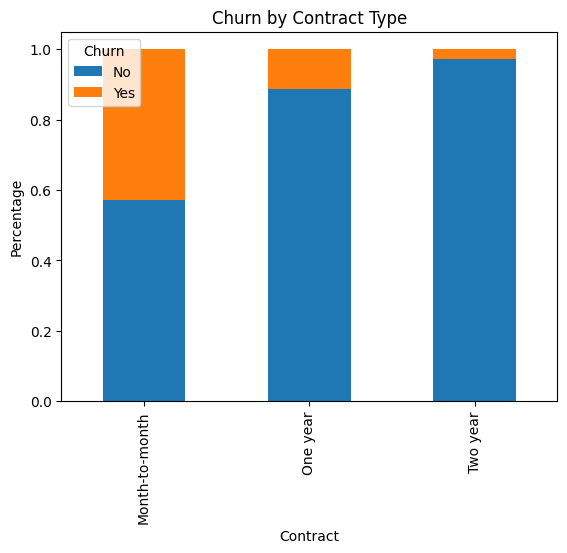

In [ ]:

# 🔍 EDA 4: Churn by Contract Type

# This chart compares churn for each type of contract:
# - Month-to-month
# - One year
# - Two year
#
# Usually, customers on a month-to-month plan leave more often.
# This is because they are not locked in and can cancel anytime.
#
# On the other hand, customers with 1-year or 2-year contracts usually stay longer.
#
# 💡 Business Tip:
# Offer discounts or special deals to month-to-month users to encourage long-term contracts.
pd.crosstab(df['Contract'], df['Churn'], normalize='index').plot(kind='bar', stacked=True)
plt.title("Churn by Contract Type")
plt.ylabel("Percentage")
plt.show()

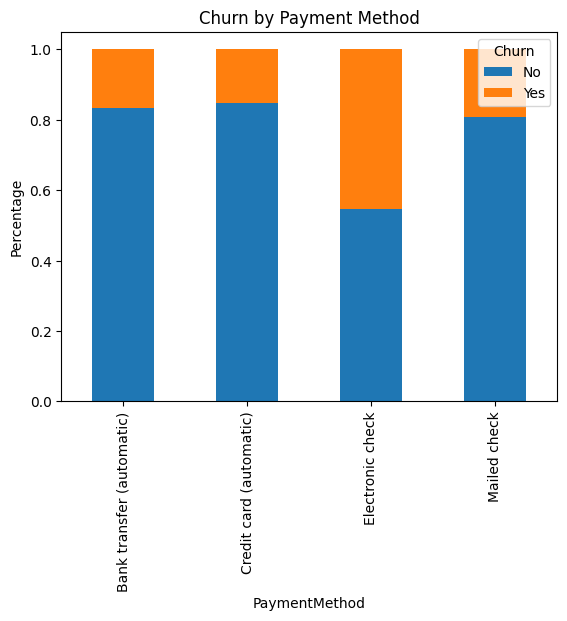

In [ ]:

# 🔍 EDA 5: Churn by Payment Method

# This graph shows how churn is different for each payment method.
# Example payment methods:
# - Credit card
# - Bank transfer
# - Electronic check
# - Mailed check
#
# If we see that more customers leave when using a certain method (like electronic check),
# it may mean those customers are less satisfied or find it harder to pay.
#
# 💡 Business Tip:
# If automatic payment methods (like credit card or bank transfer) reduce churn,
# then the company can encourage customers to switch to them.
pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index').plot(kind='bar', stacked=True)
plt.title("Churn by Payment Method")
plt.ylabel("Percentage")
plt.show()

# Step 3 Data Preprocessing
✅ Step 4: Data Preprocessing

I'll do the following tasks step-by-step:

1. 🔍 Handle missing values


2. 🔄 Encode categorical columns


3. 📏 Scale numeric features


4. ⚖ Handle class imbalance (using SMOTE or class_weight)




In [ ]:
#1.🔍 Handle missing values
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
#Check Rows and columns
df.shape

(7043, 21)

In [ ]:
#Check Data types
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


#2. 🔄 Encode categorical columns

# 📊 Step: Understanding Data Types Before Encoding


 We first checked the data types of all columns using:
# df.dtypes

 Based on the output, we observed the following:

# ✔ Columns that are already numeric (no need to convert):
 - SeniorCitizen (int64)
 - tenure (int64)
 - MonthlyCharges (float64)
 - TotalCharges (object → needs conversion to float)

# 🔄 Columns that need to be converted to numeric form:
# These are object (text) type columns and need encoding:
 - gender                (Male/Female)
 - Partner               (Yes/No)
 - Dependents            (Yes/No)
 - PhoneService          (Yes/No)
 - MultipleLines         (Yes/No/No phone service)
 - InternetService       (DSL/Fiber optic/No)
 - OnlineSecurity        (Yes/No/No internet service)
 - OnlineBackup          (Yes/No/No internet service)
 - DeviceProtection      (Yes/No/No internet service)
 - TechSupport           (Yes/No/No internet service)
 - StreamingTV           (Yes/No/No internet service)
 - StreamingMovies       (Yes/No/No internet service)
 - Contract              (Month-to-month/One year/Two year)
 - PaperlessBilling      (Yes/No)
 - PaymentMethod         (Bank transfer/Credit card/etc.)
 - Churn                 (Yes/No) ➝ Target column

# 🛑 Note:
# - customerID is a unique identifier and should be dropped
# - TotalCharges must be converted from object to float

In [ ]:
#  Drop customerID
# Dropping 'customerID' because it is a unique identifier for each customer
# It does not carry any predictive power and may negatively impact model performance
df.drop('customerID', axis=1, inplace=True)



In [ ]:
#Column
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# Check Data type of TotalCharges
df['TotalCharges'].dtype

dtype('O')

In [ ]:
# 🔢 Step 2: Convert 'TotalCharges' to Numeric

# This column is stored as object but contains numbers.
# We convert it to float, and handle errors with 'coerce' to turn invalid entries into NaN.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')



In [ ]:
# Check Data type of TotalCharges
df['TotalCharges'].dtype

dtype('float64')

In [ ]:
# Check if any NaN values appeared after conversion
print(df['TotalCharges'].isnull().sum())



11


In [ ]:
# Remove rows with missing TotalCharges (if any)
df.dropna(inplace=True)


In [ ]:
#Check missing values Again
df['TotalCharges'].isnull().sum()

np.int64(0)

In [ ]:
# Check Data type of TotalCharges
df['TotalCharges'].dtype

dtype('float64')

In [ ]:
# 🔁  Label Encode Binary Categorical Columns (Yes/No)
# ---------------------------------------------------------------
# We convert 'Yes' to 1 and 'No' to 0 for columns with only two categories.

binary_columns = [
    'gender', 'Partner', 'Dependents',
    'PhoneService', 'PaperlessBilling', 'Churn'
]

# Replace 'Yes' with 1 and 'No' with 0 in binary columns
df[binary_columns] = df[binary_columns].replace({'Yes': 1, 'No': 0})

# Also encode 'gender' as Male=1, Female=0
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})





/tmp/ipython-input-234-805161365.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_columns] = df[binary_columns].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-234-805161365.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})


In [ ]:
multi_class_cols = [
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaymentMethod'
]

df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)

In [ ]:
# Check if any columns are still of object type
df.select_dtypes(include='object').columns

Index([], dtype='object')

In [ ]:
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
# Convert all bool columns (True/False) to integer (1/0)
df = df.astype({col: int for col in df.select_dtypes(include='bool').columns})

In [ ]:
df.select_dtypes(include='bool').columns

Index([], dtype='object')

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#Step 4

#📏Scale Numeric Features
# We need to scale tenure , Montly Charges , and Total Charges

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
# split the Data
from sklearn.model_selection import train_test_split
x=df.drop('Churn',axis=1)
y=df['Churn']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
#⚖ Handle class imbalance (using SMOTE or class_weight)
#Apply SMOTE (Class Balancing)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
# Optional: Check class distribution after resampling
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())


Before SMOTE: Churn
0    4130
1    1495
Name: count, dtype: int64
After SMOTE: Churn
0    4130
1    4130
Name: count, dtype: int64


In [ ]:

# Step 5
# 📌 Model 1: Logistic Regression
# Logistic Regression is a simple ML algorithm used for binary classification (Yes/No).
# It helps us build a baseline model to predict customer churn.
# We'll train this model on our balanced training data (after SMOTE),
# then test how well it predicts churn using accuracy, precision, recall, and F1-score.


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# Create model and train on resampled data
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train_resampled, y_train_resampled)
# Predict on test set
y_pred_lr = lr.predict(x_test)
# Evaluate
print("🔍 Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))


🔍 Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1033
           1       0.52      0.74      0.61       374

    accuracy                           0.75      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.79      0.75      0.76      1407



In [ ]:
# Model 2 : Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(x_test)
print("🌲 Random Forest Results:")
print(classification_report(y_test, y_pred_rf))


🌲 Random Forest Results:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1033
           1       0.56      0.64      0.60       374

    accuracy                           0.77      1407
   macro avg       0.71      0.73      0.72      1407
weighted avg       0.78      0.77      0.78      1407



In [ ]:
# 📌 Model 3: XGBoost
# XGBoost (Extreme Gradient Boosting) is a high-performance model
# that builds multiple small trees in sequence to improve accuracy.
# It's fast, powerful, and works well on imbalanced datasets.
# It also helps us later in model interpretability (with SHAP).


from xgboost import XGBClassifier
from sklearn.metrics import classification_report
# Create XGBoost Model
xgb = XGBClassifier(random_state=42)
xgb.fit(x_train_resampled, y_train_resampled)
y_pred_xgb = xgb.predict(x_test)
print("🚀 XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))

🚀 XGBoost Results:
              precision    recall  f1-score   support

           0       0.87      0.81      0.83      1033
           1       0.55      0.66      0.60       374

    accuracy                           0.77      1407
   macro avg       0.71      0.73      0.72      1407
weighted avg       0.78      0.77      0.77      1407



In [ ]:
#🔹 *Step 6: Model Interpretability*

#*🔍 Explain Predictions:*

#* Use *SHAP* or *LIME* to explain how the model makes decisions
#* Identify most important features causing churn
#* Include visual plots (SHAP summary/force plot or LIME explanation)



In [ ]:
# 🔹 Step 6: Model Interpretability with SHAP

# 🔍 We now want to understand how the model makes predictions.
# SHAP (SHapley Additive exPlanations) helps us explain:
# - Which features (like tenure, contract, etc.) are most important
# - How they affect the model’s churn prediction for each customer
# This makes our model transparent and helps build trust.
# Install and Import SHAP
!pip install shap


In [ ]:
import shap

# Initialize the SHAP explainer for tree-based models (like XGBoost)
explainer = shap.TreeExplainer(xgb)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(x_test)

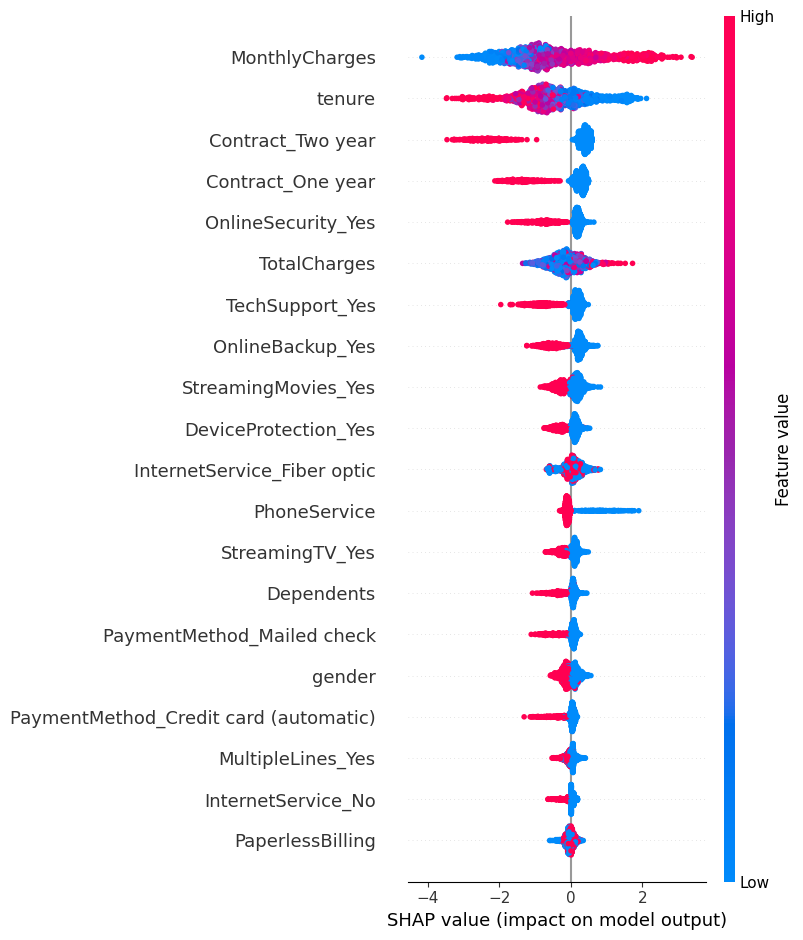

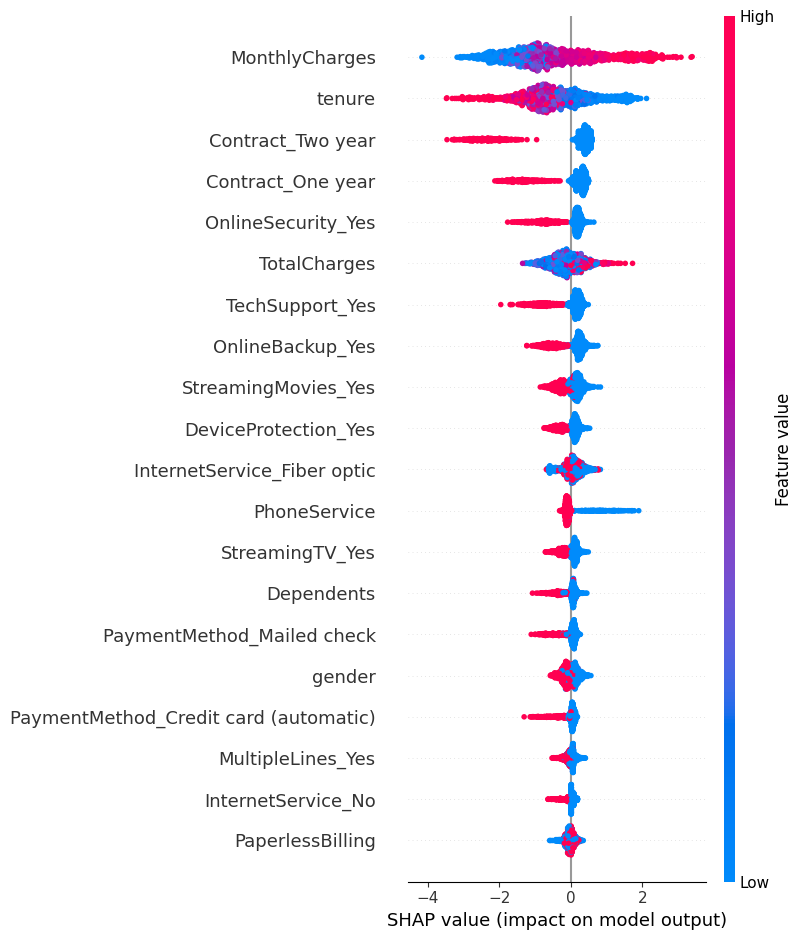

In [ ]:
# Summary plot shows which features impact churn the most

shap.summary_plot(shap_values,x_test)

In [ ]:
# For example: explain prediction for first customer in test set
 🎯 SHAP Force Plot — Single Prediction Explanation
# ---------------------------------------------------------------
# We can also explain why the model predicted churn for 1 customer
# Red pushes prediction toward churn, blue pushes toward not churn

shap.initjs()
shap.force_plot(explainer.expected_value,shap_values[0],x_test.iloc[0])


# 💼 Step 7: Business Insights Based on Model Results


# These insights are based on the SHAP feature importance and model predictions.
# They can help the telecom company reduce customer churn:

# 🔹 1. Contract Type Matters:
# Customers with "Month-to-month" contracts are most likely to churn.
# 📢 Suggestion: Offer loyalty discounts or convert them to longer-term contracts.

# 🔹 2. High Monthly Charges Lead to Higher Churn:
# Customers paying more monthly are more likely to leave.
# 💰 Suggestion: Offer bundled services or loyalty rewards for high-bill users.

# 🔹 3. Short Tenure = Higher Churn Risk:
# New customers (low tenure) are more likely to churn early.
# 🎯 Suggestion: Improve onboarding experience and offer early engagement bonuses.

# 🔹 4. Tech Support & Online Security Services Matter:
# Customers who don't have Tech Support or Online Security are more likely to leave.
# 🛡 Suggestion: Promote these services as part of retention packages.

# 🔹 5. Paperless Billing & Payment Method Influence Churn:
# Customers with manual payments or checks churn more.
# 💳 Suggestion: Encourage auto-pay and digital payments to improve retention.

# These strategies can help the company reduce churn and improve customer satisfaction.